In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
dataset = pd.read_csv("miami_housing.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

In [4]:
dataset.describe()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13932.000000,13932.000000,1.393200e+04,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000
mean,25.728811,-80.327475,2.356496e+12,3.999419e+05,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.014930,6.655828,3.513997
std,0.140633,0.089199,1.199290e+12,3.172147e+05,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444
min,25.434333,-80.542172,1.020008e+11,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000
25%,25.620056,-80.403278,1.079160e+12,2.350000e+05,5400.000000,1470.000000,810.000000,3299.450000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000,0.000000,4.000000,2.000000
50%,25.731810,-80.338911,3.040300e+12,3.100000e+05,7500.000000,1877.500000,2765.500000,7106.300000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000,0.000000,7.000000,4.000000
75%,25.852269,-80.258019,3.060170e+12,4.280000e+05,9126.250000,2471.000000,12352.250000,12102.600000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000,0.000000,9.000000,4.000000
max,25.974382,-80.119746,3.660170e+12,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000


In [5]:
dataset.head()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


overall age affects the most?

In [7]:
plt.figure(figsize=(16, 6))
sb.scatterplot(data=dataset, x="longitude", y="latitude", hue="month_sold")

ValueError: Could not interpret value `longitude` for parameter `x`

<Figure size 1152x432 with 0 Axes>

<AxesSubplot:xlabel='age', ylabel='bmi'>

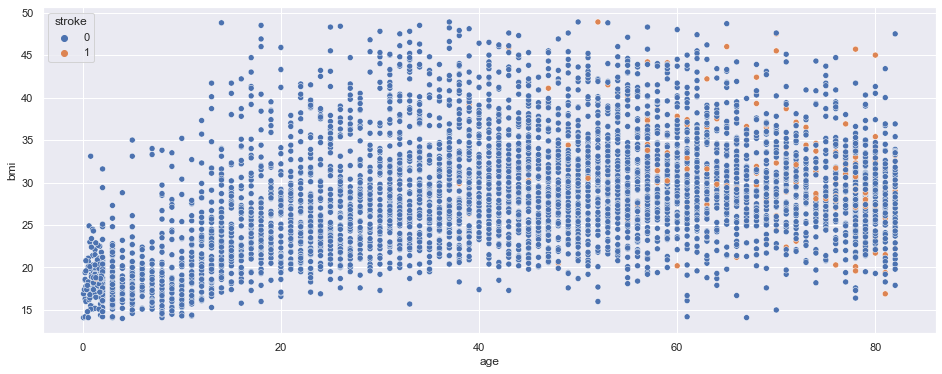

In [50]:
plt.figure(figsize=(16, 6))
sb.scatterplot(data=dataset, x="age", y="bmi", hue="stroke")

### Trying the actual thing

In [60]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [63]:
dataset['gender'].replace({'Female': 0, 'Male': 1},inplace=True)

In [64]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,1,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [65]:
dataset['ever_married'].replace({'No': 0, 'Yes': 1},inplace=True)
dataset['ever_married'].replace({'No': 0, 'Yes': 1},inplace=True)

I think for this 

1. Random Forest with hyperparater tuning can be done
2. KNN 
3. XGBoost

